In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:


# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

richards bay za
celestun mx
bull savanna jm
atuona pf
bethel us
clearwater us
piacabucu br
savannah bight hn
mehamn no
atuona pf
kapoeta sd
bredasdorp za
oktyabrskiy ru
saint-philippe re
mataura pf
port hardy ca
lolua tv
havoysund no
albany au
okandja ga
porto novo cv
saleaula ws
yellowknife ca
kaitangata nz
arraial do cabo br
mataura pf
tabiauea ki
ushuaia ar
yellowknife ca
ixtapa mx
broken hill au
airai pw
port alfred za
port lincoln au
mataura pf
waw sd
pamanukan id
chicama pe
matara lk
honiara sb
vaini to
mataura pf
rikitea pf
taolanaro mg
taolanaro mg
pevek ru
marburg de
hobart au
manta ec
pevek ru
hithadhoo mv
srednekolymsk ru
pevek ru
chippewa falls us
chokurdakh ru
georgetown sh
thompson ca
bambous virieux mu
kungalv se
sentyabrskiy ru
tommot ru
yellowknife ca
saldanha za
adrar dz
kunming cn
vaitupu wf
cidreira br
puerto ayora ec
nalut ly
rikitea pf
haines junction ca
teguldet ru
hobart au
avarua ck
beloha mg
tiszacsege hu
vaini to
thompson ca
lanzhou cn
punta arenas cl
nanorta

kapaa us
albany au
puerto ayora ec
palabuhanratu id
nyagan ru
east london za
biltine td
port moresby pg
pisco pe
taolanaro mg
new norfolk au
albany au
okhotsk ru
rikitea pf
muzaffargarh pk
zyryanka ru
pudozh ru
rikitea pf
victoria sc
bengkulu id
ribeira grande pt
bethel us
mataura pf
punta arenas cl
hualmay pe
atar mr
punta arenas cl
shalyhyne ua
melville ca
goure ne
puerto ayora ec
albany au
san blas mx
inhambane mz
vaini to
tabou ci
saint-francois gp
kaeo nz
haines junction ca
quatre cocos mu
coquimbo cl
apatou gf
brae gb
halifax ca
korla cn
butaritari ki
kodiak us
lompoc us
roald no
kapaa us
opuwo na
nome us
illoqqortoormiut gl
rikitea pf
cockburn town bs
eirunepe br
cape town za
vaitupu wf
ahipara nz
mataura pf
nizhniy kuranakh ru
bluff nz
nishihara jp
srednekolymsk ru
mizdah ly
college us
lapeer us
keti bandar pk
bredasdorp za
ushuaia ar
krasnoyarsk-45 ru
nouakchott mr
vardo no
sao joao da barra br
bredasdorp za
cabo san lucas mx
keti bandar pk
songkhla th
kaeo nz
mareeba au
faanu

cape town za
cape town za
mar del plata ar
tuktoyaktuk ca
kadykchan ru
vaini to
bluff nz
cabo san lucas mx
qaanaaq gl
port alfred za
norton zw
luderitz na
cap malheureux mu
cidreira br
panaba mx
lebu cl
port elizabeth za
santa maria cv
birao cf
albany au
tsihombe mg
khatanga ru
whitehorse ca
yellowknife ca
illoqqortoormiut gl
jiroft ir
rikitea pf
narsaq gl
punta arenas cl
saskylakh ru
tasiilaq gl
lopatino ru
dikson ru
vanavara ru
nyaunglebin mm
mataura pf
kizukuri jp
rawson ar
vaini to
busselton au
jamestown sh
cherskiy ru
souillac mu
san pedro ar
ushuaia ar
mataura pf
kaitangata nz
attawapiskat ca
upernavik gl
rikitea pf
pitimbu br
imeni babushkina ru
bambous virieux mu
bengkulu id
hilo us
cabo san lucas mx
tuatapere nz
pedasi pa
smithers ca
ushuaia ar
talnakh ru
hobart au
ilulissat gl
grand river south east mu
illoqqortoormiut gl
myanaung mm
vaitupu wf
taoudenni ml
san andres co
ushuaia ar
hermanus za
ust-kuyga ru
najran sa
los llanos de aridane es
rikitea pf
korgen no
hilo us
vostok

In [4]:
# list for cities
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

612

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Build the basic url for the openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | celestun
Processing Record 3 of Set 1 | bull savanna
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | clearwater
Processing Record 7 of Set 1 | piacabucu
Processing Record 8 of Set 1 | savannah bight
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | kapoeta
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | oktyabrskiy
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | port hardy
Processing Record 16 of Set 1 | lolua
City not found. Skipping...
Processing Record 17 of Set 1 | havoysund
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | okandja
City not found. Skipping...
Processing Record 20 of Set 1 | porto novo
Processing Record 21 of Set 1 | saleaula
City not foun

Processing Record 37 of Set 4 | los llanos de aridane
Processing Record 38 of Set 4 | port hedland
Processing Record 39 of Set 4 | shizunai
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | guasdualito
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | baytown
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | zaozerne
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | grand centre
City not found. Skipping...
Processing Record 49 of Set 4 | ponta delgada
Processing Record 50 of Set 4 | san cristobal
Processing Record 1 of Set 5 | benito juarez
Processing Record 2 of Set 5 | udachnyy
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | mandalgovi
Processing Record 5 of Set 5 | oulu
Processing Record 6 of Set 5 | yumen
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | raudeberg
Pro

Processing Record 26 of Set 8 | nizhniy kuranakh
Processing Record 27 of Set 8 | mizdah
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | lapeer
Processing Record 30 of Set 8 | keti bandar
Processing Record 31 of Set 8 | krasnoyarsk-45
City not found. Skipping...
Processing Record 32 of Set 8 | nouakchott
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | songkhla
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | morro bay
Processing Record 37 of Set 8 | zhangye
Processing Record 38 of Set 8 | alto araguaia
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | calama
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 44 of Set 8 | sumkino
Processing Record 45 of Set 8 | baglung
Processing Record 46 of Set 8 | bafia
Processing Record 47 of Set 8 | kavieng
Processing

Processing Record 14 of Set 12 | yulara
Processing Record 15 of Set 12 | inirida
Processing Record 16 of Set 12 | la reforma
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 19 of Set 12 | norton
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | panaba
Processing Record 22 of Set 12 | santa maria
Processing Record 23 of Set 12 | birao
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | jiroft
City not found. Skipping...
Processing Record 26 of Set 12 | lopatino
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | nyaunglebin
Processing Record 29 of Set 12 | kizukuri
Processing Record 30 of Set 12 | rawson
Processing Record 31 of Set 12 | pitimbu
Processing Record 32 of Set 12 | imeni babushkina
Processing Record 33 of Set 12 | tuatapere
Processing Record 34 of Set 12 | pedasi
Processing Record 35 of Set 12 | myanaung
Processin

In [9]:
len(city_data)

559

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.7830,32.0377,61.25,87,3,3.80,ZA,2022-04-20 02:14:11
1,Celestun,20.8667,-90.4000,78.64,73,0,17.20,MX,2022-04-20 02:22:53
2,Bull Savanna,17.8868,-77.5902,74.34,82,19,3.83,JM,2022-04-20 02:22:54
3,Atuona,-9.8000,-139.0333,79.30,72,23,16.24,PF,2022-04-20 02:22:54
4,Bethel,41.3712,-73.4140,43.68,63,14,10.00,US,2022-04-20 02:22:55
5,Clearwater,27.9659,-82.8001,73.38,51,0,10.00,US,2022-04-20 02:22:55
6,Piacabucu,-10.4056,-36.4344,77.58,85,18,4.99,BR,2022-04-20 02:22:56
7,Savannah Bight,16.4500,-85.8500,80.44,74,6,9.62,HN,2022-04-20 02:22:56
8,Mehamn,71.0357,27.8492,37.76,93,100,8.48,NO,2022-04-20 02:22:57
9,Kapoeta,4.7717,33.5903,75.22,76,100,5.99,SS,2022-04-20 02:22:57


In [46]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Richards Bay,ZA,2022-04-20 02:14:11,-28.7830,32.0377,61.25,87,3,3.80
1,Celestun,MX,2022-04-20 02:22:53,20.8667,-90.4000,78.64,73,0,17.20
2,Bull Savanna,JM,2022-04-20 02:22:54,17.8868,-77.5902,74.34,82,19,3.83
3,Atuona,PF,2022-04-20 02:22:54,-9.8000,-139.0333,79.30,72,23,16.24
4,Bethel,US,2022-04-20 02:22:55,41.3712,-73.4140,43.68,63,14,10.00
5,Clearwater,US,2022-04-20 02:22:55,27.9659,-82.8001,73.38,51,0,10.00
6,Piacabucu,BR,2022-04-20 02:22:56,-10.4056,-36.4344,77.58,85,18,4.99
7,Savannah Bight,HN,2022-04-20 02:22:56,16.4500,-85.8500,80.44,74,6,9.62
8,Mehamn,NO,2022-04-20 02:22:57,71.0357,27.8492,37.76,93,100,8.48
9,Kapoeta,SS,2022-04-20 02:22:57,4.7717,33.5903,75.22,76,100,5.99


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

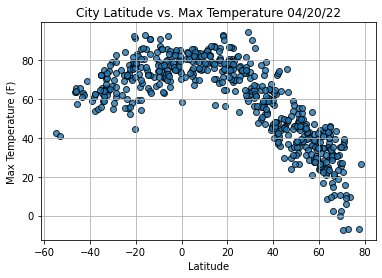

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

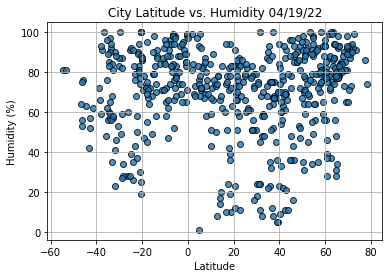

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

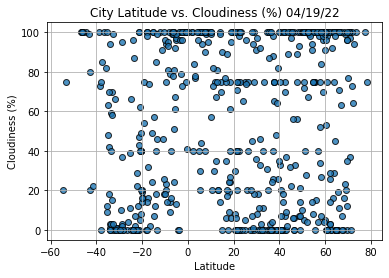

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

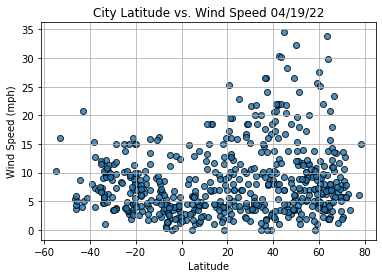

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Celestun,MX,2022-04-20 02:22:53,20.8667,-90.4000,78.64,73,0,17.20
2,Bull Savanna,JM,2022-04-20 02:22:54,17.8868,-77.5902,74.34,82,19,3.83
4,Bethel,US,2022-04-20 02:22:55,41.3712,-73.4140,43.68,63,14,10.00
5,Clearwater,US,2022-04-20 02:22:55,27.9659,-82.8001,73.38,51,0,10.00
7,Savannah Bight,HN,2022-04-20 02:22:56,16.4500,-85.8500,80.44,74,6,9.62
8,Mehamn,NO,2022-04-20 02:22:57,71.0357,27.8492,37.76,93,100,8.48
9,Kapoeta,SS,2022-04-20 02:22:57,4.7717,33.5903,75.22,76,100,5.99
11,Oktyabrskiy,RU,2022-04-20 02:22:58,54.4815,53.4710,47.48,94,100,5.03
14,Port Hardy,CA,2022-04-20 02:21:11,50.6996,-127.4199,48.38,71,75,3.44
15,Havoysund,NO,2022-04-20 02:23:00,70.9963,24.6622,39.43,87,37,7.43


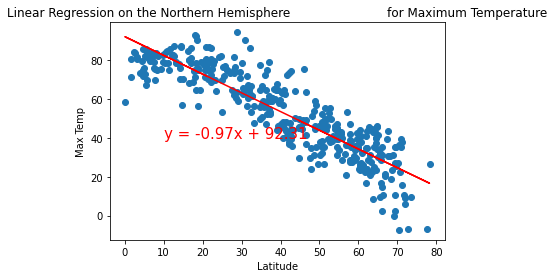

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

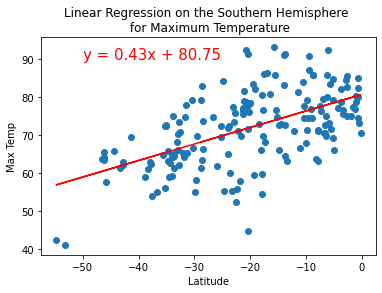

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [42]:
# Finding correlation between the latitude and the maximum temperature is strong to 
# very strong becuase the r- value is less than -0.5 for the Northern Hemisphere and greater
# than 0.5 for the Southern Hemishpere, as shown by the plots here. This means that as we 
# approach the equator, 0 degree latitude, the temperatures become warmer. And when we are
# further from the equator the temperatures become cooler. Check the r-values for your plots.

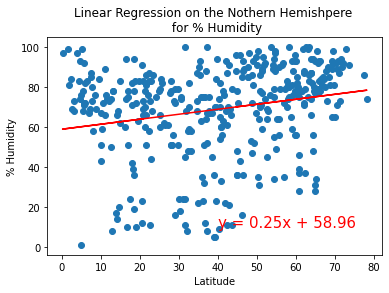

In [54]:
# Linear regressioin on the Nothern Hemishpere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Nothern Hemishpere \n for % Humidity', '% Humidity', (40,10))

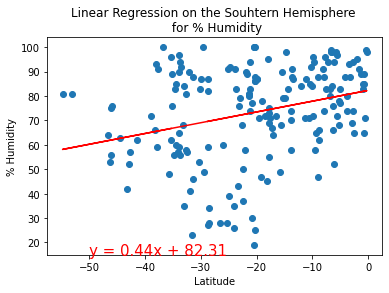

In [55]:
# Linear regression on the Southern Hemishpere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Souhtern Hemisphere \n for % Humidity', '% Humidity', (-50, 15))

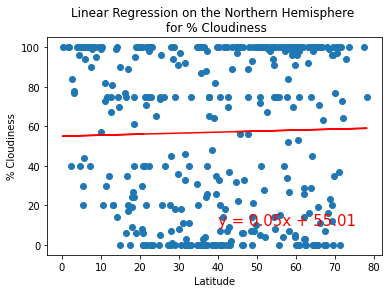

In [56]:
# Linear Regression on the Northern Hemishpere for percent cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,10))

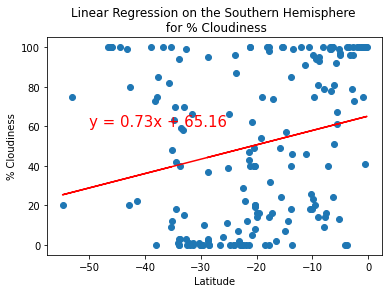

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

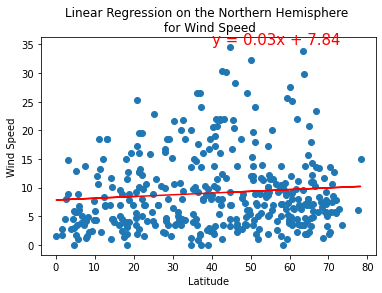

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

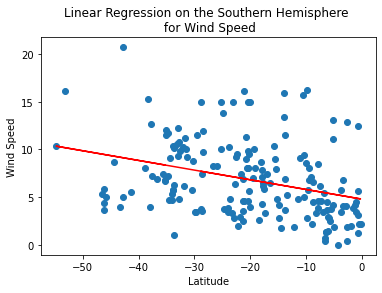

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))